In [9]:
from rdkit import Chem
from rdkit.Chem import AllChem
import mdtraj as mdt
import os

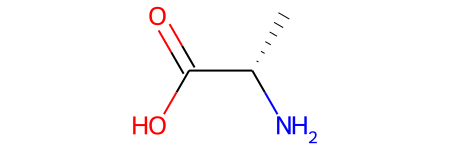

In [2]:
mol = Chem.MolFromSmiles("C[C@@H](C(=O)O)N")
mol

In [3]:
mol = Chem.AddHs(mol)
AllChem.EmbedMultipleConfs(mol, numConfs=1, randomSeed=1024)
assert mol.GetNumConformers() == 1

In [5]:
Chem.MolToPDBFile(mol, filename="./data/alanine.pdb")

In [13]:
!cat data/alanine.pdb

HETATM    1  C1  ALA     1      -1.424  -0.563  -0.002  1.00  0.00           C  
HETATM    2  C2  ALA     1      -0.255   0.333   0.343  1.00  0.00           C  
HETATM    3  C3  ALA     1       0.998  -0.463   0.479  1.00  0.00           C  
HETATM    4  O1  ALA     1       1.010  -1.403   1.319  1.00  0.00           O  
HETATM    5  O2  ALA     1       2.122  -0.179  -0.296  1.00  0.00           O  
HETATM    6  N1  ALA     1      -0.109   1.357  -0.645  1.00  0.00           N  
HETATM    7  H1  ALA     1      -2.241   0.015  -0.440  1.00  0.00           H  
HETATM    8  H2  ALA     1      -1.762  -1.064   0.911  1.00  0.00           H  
HETATM    9  H3  ALA     1      -1.101  -1.352  -0.737  1.00  0.00           H  
HETATM   10  H4  ALA     1      -0.476   0.818   1.314  1.00  0.00           H  
HETATM   11  H5  ALA     1       2.671  -0.989  -0.615  1.00  0.00           H  
HETATM   12  H6  ALA     1       0.622   1.176  -1.359  1.00  0.00           H  
HETATM   13  H7  ALA     1  

In [10]:
# Substitute residue name UNL for ALA in alanine.pdb
lines = []
with open("data/alanine.pdb", "r") as fp:
    for line in fp:
        lines.append(line.replace("UNL", "ALA"))

os.remove("data/alanine.pdb")
with open("data/alanine.pdb", "w") as fp:
    fp.writelines(lines)

In [11]:
traj = mdt.load("./data/alanine.pdb")
traj

<mdtraj.Trajectory with 1 frames, 13 atoms, 1 residues, without unitcells at 0x7fca593c1050>

In [12]:
topology = traj.topology
topology_df, bonds = topology.to_dataframe()
topology_df

,serial,name,element,resSeq,resName,chainID,segmentID
0,1,C1,C,1,ALA,0,
1,2,C2,C,1,ALA,0,
2,3,C3,C,1,ALA,0,
3,4,O,O,1,ALA,0,
4,5,OXT,O,1,ALA,0,
5,6,N1,N,1,ALA,0,
6,7,H,H,1,ALA,0,
7,8,H2,H,1,ALA,0,
8,9,H3,H,1,ALA,0,
9,10,H4,H,1,ALA,0,
